In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data and parse dates
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# get the 2.5th and 97.5th percentiles of the 'value' column
value_low = df['value'].quantile(0.025)
value_high = df['value'].quantile(0.975)

# keep only the rows where the 'value' column is within the percentiles
df = df[(df['value'] >= value_low) & (df['value'] <= value_high)]

Figure(1600x600)


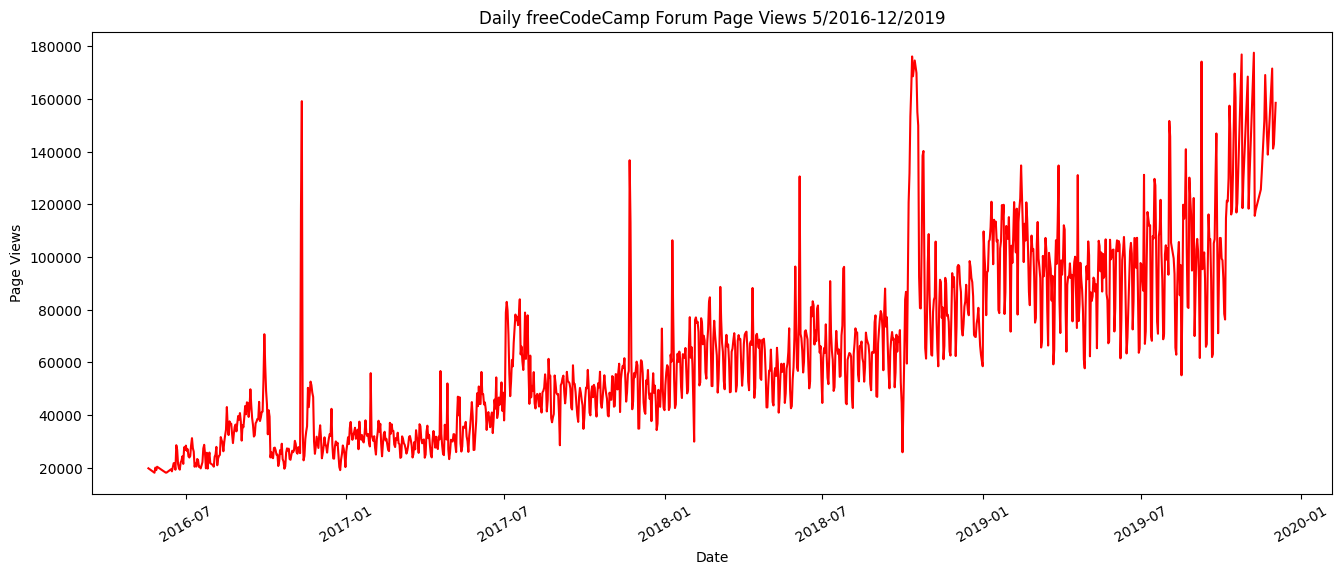

In [26]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df['value'], color='r')
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
       xlabel='Date', ylabel='Page Views')
plt.xticks(rotation=30)
print(fig)

In [27]:
df_bar = df.copy()
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


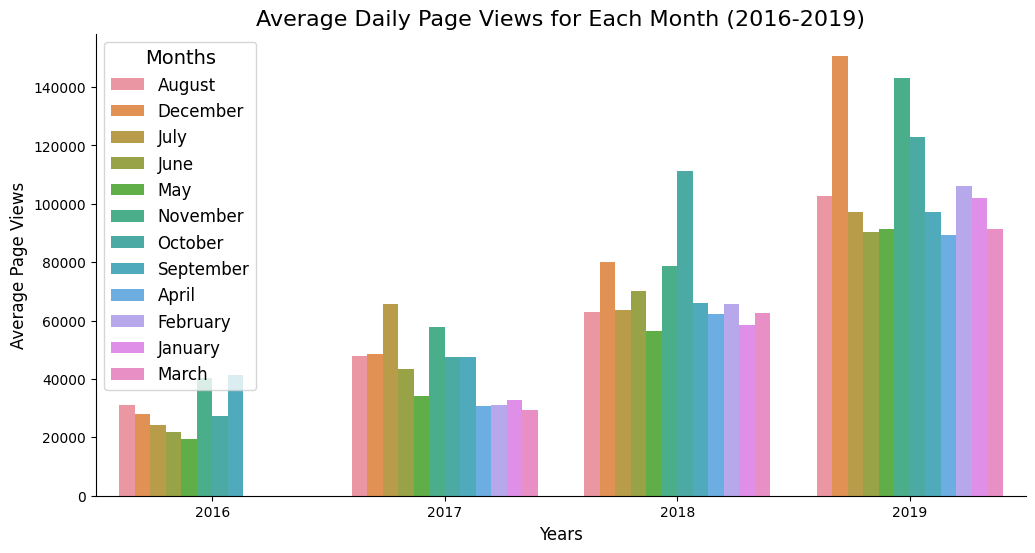

In [28]:
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    # group data by year and month, get mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

    #set up fig and ax
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='year', 
                y='value', 
                hue='month', 
                data=df_bar,  # change this line
                ax=ax
               )

    #set title and axis labels
    ax.set(title='Average Daily Page Views for Each Month (2016-2019)', 
          xlabel='Years', 
          ylabel='Average Page Views'
          )

    # Set Legend
    ax.legend(title='Months')
  
    # Draw bar plot

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig